In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

pd.set_option('display.max_columns', None)

In [49]:
df_store = pd.read_csv('data/store.csv', low_memory = False)
df_train = pd.read_csv('data/train.csv', parse_dates = True, low_memory = False, index_col = 'Date')

In [50]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [51]:
df_store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [53]:
print("In total: ", df_train.shape)
df_train.head()

In total:  (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [54]:
# data extraction
df_train['Year'] = df_train.index.year
df_train['Month'] = df_train.index.month
df_train['Day'] = df_train.index.day
df_train['WeekOfYear'] = df_train.index.weekofyear

# adding new variable
df_train['SalePerCustomer'] = df_train['Sales']/df_train['Customers']
df_train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 13 columns):
Store              1017209 non-null int64
DayOfWeek          1017209 non-null int64
Sales              1017209 non-null int64
Customers          1017209 non-null int64
Open               1017209 non-null int64
Promo              1017209 non-null int64
StateHoliday       1017209 non-null object
SchoolHoliday      1017209 non-null int64
Year               1017209 non-null int64
Month              1017209 non-null int64
Day                1017209 non-null int64
WeekOfYear         1017209 non-null int64
SalePerCustomer    844340 non-null float64
dtypes: float64(1), int64(11), object(1)
memory usage: 128.6+ MB


In [56]:
df_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118


In [57]:
# closed stores
df_train[(df_train.Open == 0) & (df_train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,NaN


In [58]:
# opened stores with zero sales
zero_sales = df_train[(df_train.Open != 0) & (df_train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 13)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,2015,5,15,20,NaN
2015-03-26,674,4,0,0,1,0,0,0,2015,3,26,13,NaN
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,6,NaN
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,40,NaN
2014-09-22,357,1,0,0,1,0,0,0,2014,9,22,39,NaN


In [59]:
print("Drop those rows with closed stores and days and didn't have any sales.")
df_train = df_train[(df_train["Open"] != 0) & (df_train['Sales'] != 0)]

print("In total: ", df_train.shape)

Drop those rows with closed stores and days and didn't have any sales.
In total:  (844338, 13)


In [60]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [61]:
#Missing value count
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [62]:
# missing values in CompetitionDistance
df_store[pd.isnull(df_store['CompetitionDistance'])]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [63]:
print('Mean of Competition Distance :', df_store['CompetitionDistance'].mean())
print('Median of Competition Distance :',df_store['CompetitionDistance'].median())

Mean of Competition Distance : 5404.901079136691
Median of Competition Distance : 2325.0


As there is no obvious pattern of missing value in competition distance, we will replace it with median of the competition distance.

In [64]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

In [65]:
# no promo = no information about the promo?
_ = df_store[pd.isnull(df_store['Promo2SinceWeek'])]
_[_.Promo2 != 0].shape

(0, 10)

In [66]:
# replace NA's by 0
df_store.fillna(0, inplace = True)

In [67]:
# Using the inner join to make sure that only those observations that are present 
# in both training and store information datasets are merged together.
df_train_store = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

print('Total: ', df_train_store.shape)
df_train_store.head()

Total:  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,30,31,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,29,31,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,28,31,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,27,31,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### Looking from the Store prospective

In [68]:
df_train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [69]:
df_train_store.groupby('StoreType')['Customers'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,795.422370,387.516543,8.0,547.0,720.0,949.0,7388.0
b,15560.0,2022.211825,910.687095,219.0,1255.0,1839.5,2751.0,5494.0
c,112968.0,815.538073,329.670020,18.0,583.0,756.0,981.0,3096.0
d,258768.0,606.353935,199.247092,64.0,464.0,577.0,716.0,2239.0


In [70]:
df_train_store.groupby('StoreType')['Customers','Sales'].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


Text(0.5,1,'Average Sales per Store Type')

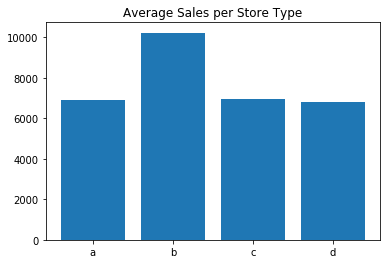

In [71]:
avg_sales = df_train_store.groupby('StoreType')['Sales'].sum()/df_train_store.groupby('StoreType')['Store'].count()
xlabels =avg_sales.index
plt.bar(xlabels, avg_sales.values)
plt.title('Average Sales per Store Type')

Store Type B has a higher average sales amount per store while Type A C D have almost the same average sales.

Text(0.5,1,'Average Sales per Assortment Level')

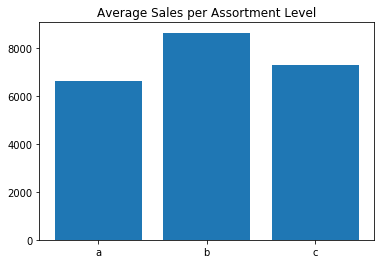

In [72]:
avg_sales = df_train_store.groupby('Assortment')['Sales'].sum()/df_train_store.groupby('Assortment')['Store'].count()
xlabels =avg_sales.index
plt.bar(xlabels, avg_sales.values)
plt.title('Average Sales per Assortment Level')

Text(0.5,1,'Sales Amount Distribution')

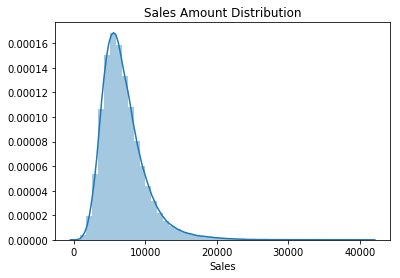

In [73]:
sns.distplot(df_train_store['Sales'])
plt.title('Sales Amount Distribution')

### Holidays effect on sales

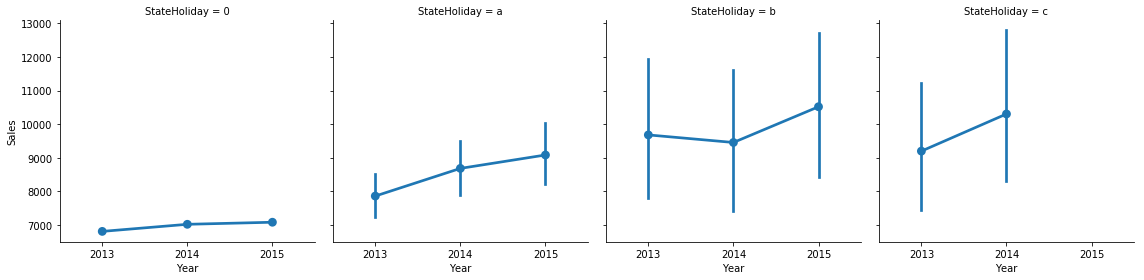

In [74]:
sns.factorplot(data = df_train_store, x = 'Year', y = "Sales", 
               col = 'StateHoliday')

State Holiday are categorized into 4 groups a = public holiday, b = Easter holiday, c = Christmas, 0 = None. From the graph above, state holidays are definitely increase sales, public holiday has a lower sales than Easter holiday and Christmas while Christmas has slightly higher than Easter.

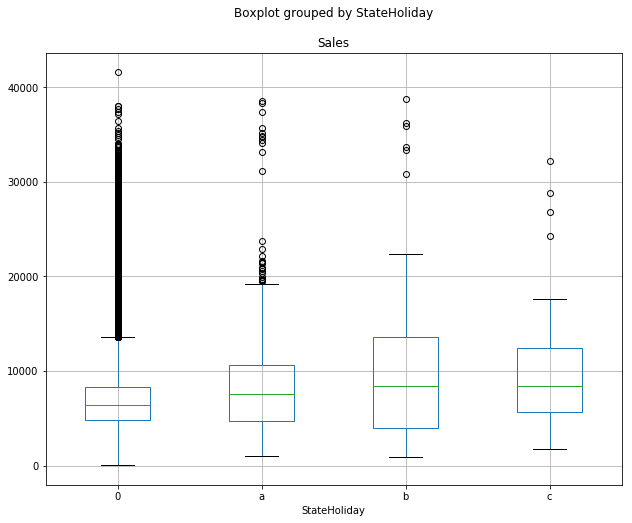

In [75]:
df_train_store.boxplot(column='Sales', by='StateHoliday', figsize=(10,8))

a = public holiday, b = Easter holiday, c = Christmas, 0 = None

From the boxplot above, Christmas has a slightly higher mean sales.

### Promotion Effect vs different aspects

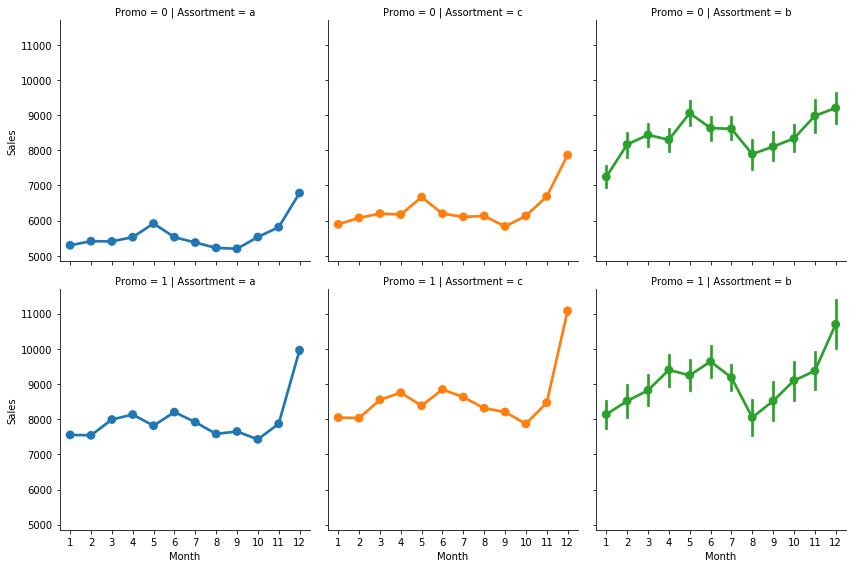

In [76]:
sns.factorplot(data = df_train_store, x = 'Month', y = "Sales", 
               col = 'Assortment',
               hue = 'Assortment',
               row = 'Promo')

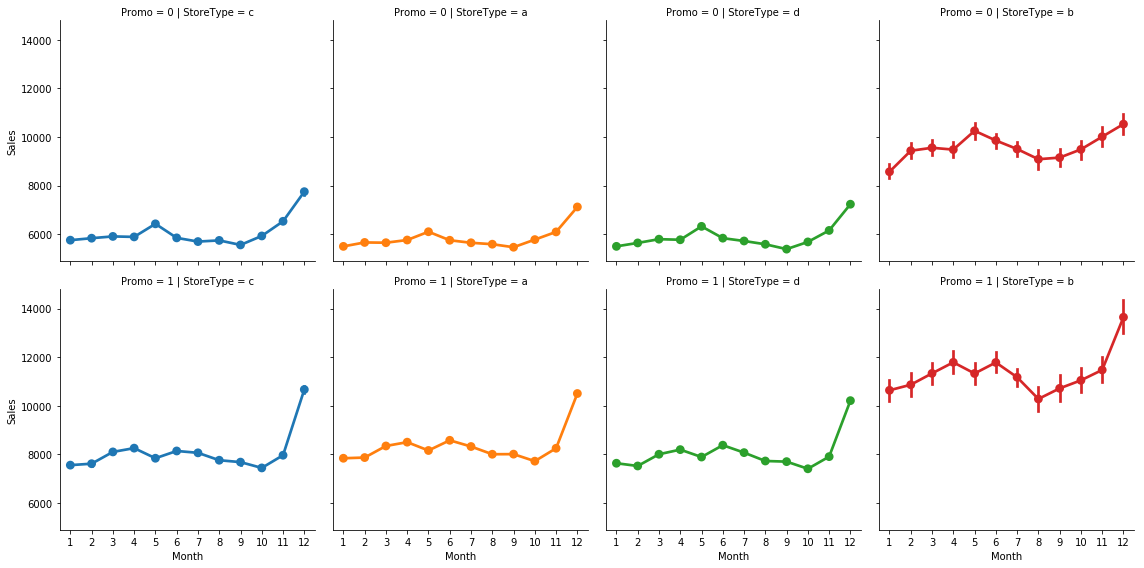

In [77]:
sns.factorplot(data = df_train_store, x = 'Month', y = "Sales", 
               col = 'StoreType',
               hue = 'StoreType',
               row = 'Promo')

#### Comparing the distribution of sales between with promo and without promo

Text(0.5,1,'Store Type C Sales Amount Distribution with or without Promo')

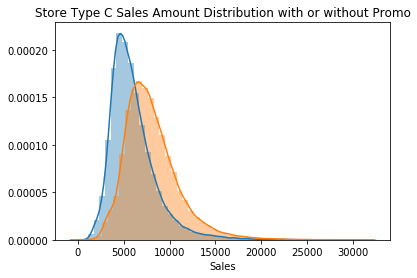

In [78]:
typec_nopromo = df_train_store[(df_train_store['Promo'] == 0) & (df_train_store['StoreType'] == 'c')]['Sales']
typec_promo = df_train_store[(df_train_store['Promo'] == 1) & (df_train_store['StoreType'] == 'c')]['Sales']

sns.distplot(typec_nopromo)
sns.distplot(typec_promo)

plt.title('Store Type C Sales Amount Distribution with or without Promo')

#### Bootstrapping and Hypothesis Testing

In [79]:
bs_sample_nopromo = np.random.choice(typec_nopromo, size=10000)
bs_sample_promo = np.random.choice(typec_promo, size=10000)

print('Mean sales for no promo at Type C Store:', bs_sample_nopromo.mean())
print('Mean sales for promo at Type C Store:', bs_sample_promo.mean())


Mean sales for no promo at Type C Store: 6002.7102
Mean sales for promo at Type C Store: 8061.4909


In [80]:
stats.ttest_ind(bs_sample_nopromo, bs_sample_promo)

Ttest_indResult(statistic=-54.07524775067768, pvalue=0.0)

Since the p-value is smaller than 0.05, we reject the null hypothesis. Therefore, promotion does have effect on increase the sales amount in Type C Store.

### Customer numbers due to promotion

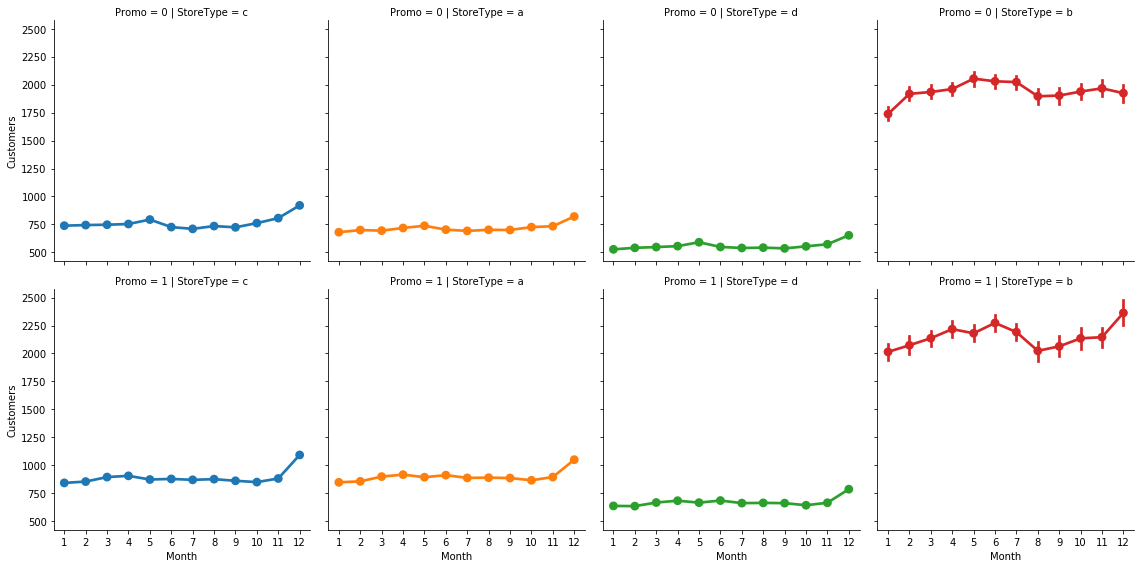

In [81]:
sns.factorplot(data = df_train_store, x = 'Month', y = "Customers", 
               col = 'StoreType',
               hue = 'StoreType',
               row = 'Promo')

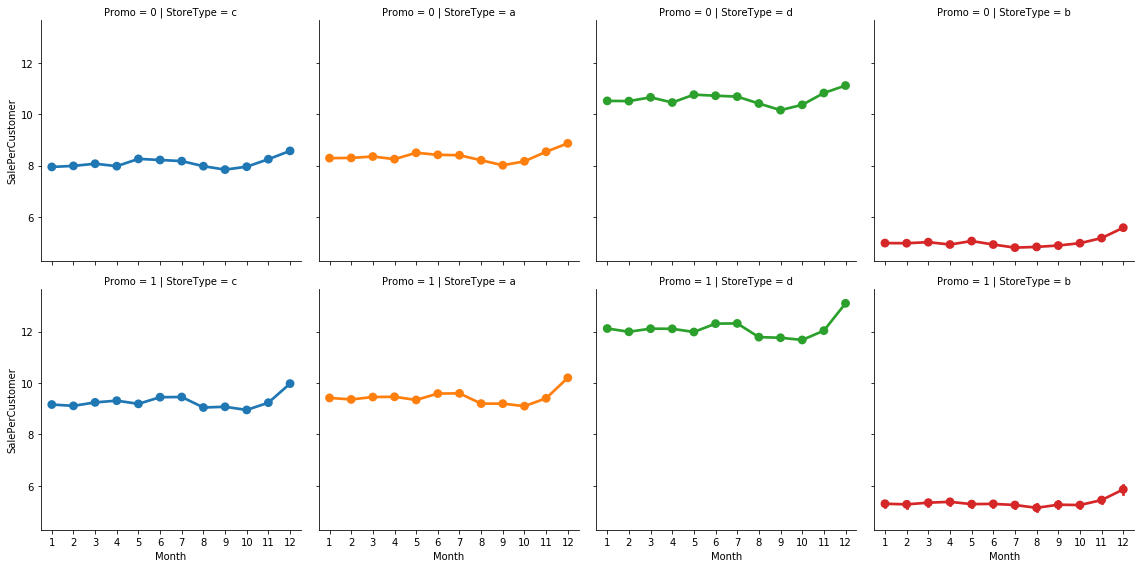

In [82]:
sns.factorplot(data = df_train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType',
               hue = 'StoreType',
               row = 'Promo')

### Day of Week vs Store Type 

Text(0.5,1,'Day of Week of Sales by Store Type')

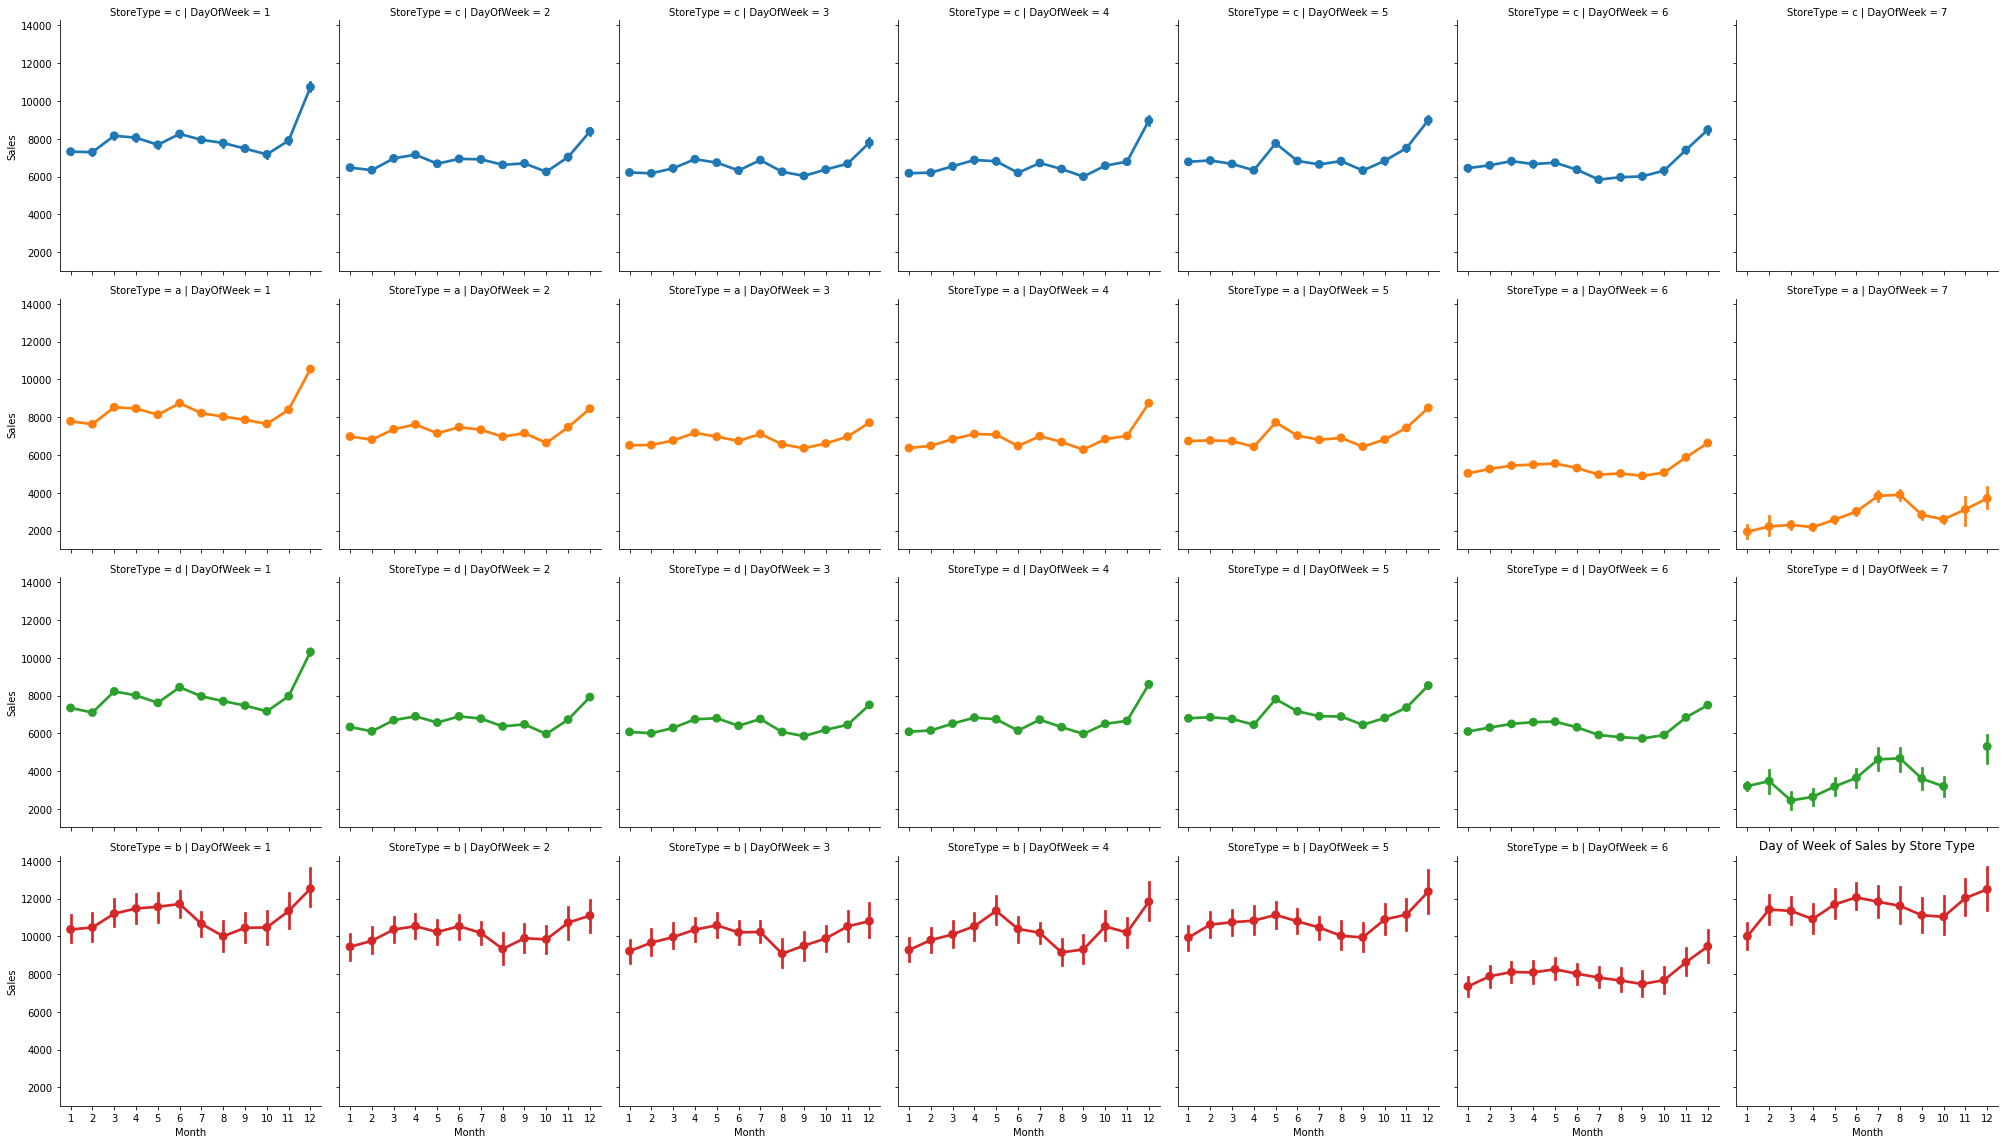

In [83]:
sns.factorplot(data = df_train_store, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', 
               hue = 'StoreType',
               row = 'StoreType')
plt.title('Day of Week of Sales by Store Type')

In [84]:
#Convert the CompetitionOpenSinceMonth and CompetitionOpenSinceYear into months only 

df_train_store['CompetitionOpenByMonth'] = 12 * (df_train_store.Year - df_train_store.CompetitionOpenSinceYear) + (df_train_store.Month - df_train_store.CompetitionOpenSinceMonth)

df_train_store['PromoOpenByMonth'] =  12 * (df_train_store.Year - df_train_store.Promo2SinceYear) + (df_train_store.WeekOfYear - df_train_store.Promo2SinceWeek) /4.35



In [85]:
#df_train_store[df_train_store['PromoOpenByMonth'] < 5000]
#df_train_store.Year[1] - df_train_store.Promo2SinceYear[1]


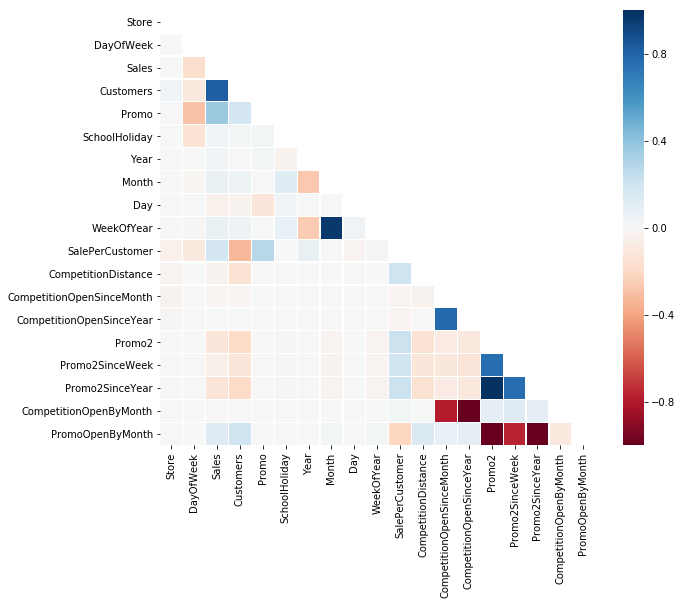

In [86]:
#Using a heatmap to show the correlation between features

#Drop the "Open" which obvious stores need to be open to have sales
all_correlation = df_train_store.drop('Open', axis = 1).corr()

mask = np.zeros_like(all_correlation)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(all_correlation, mask = mask, square = True, linewidths = .2, ax = ax, cmap = "RdBu")      
plt.show()

From the heatmap, sales has a stronger positive correlation with PromoOpenByMonth, Customer, Promo. 

However, a negative correlation is observed between Sales and Promo2 which means if there is a continuous promotion, sales tends to decrease.

### Seasonality

Looking at seasonality of differet store type, picked 1 store in each type of store for illusration. 

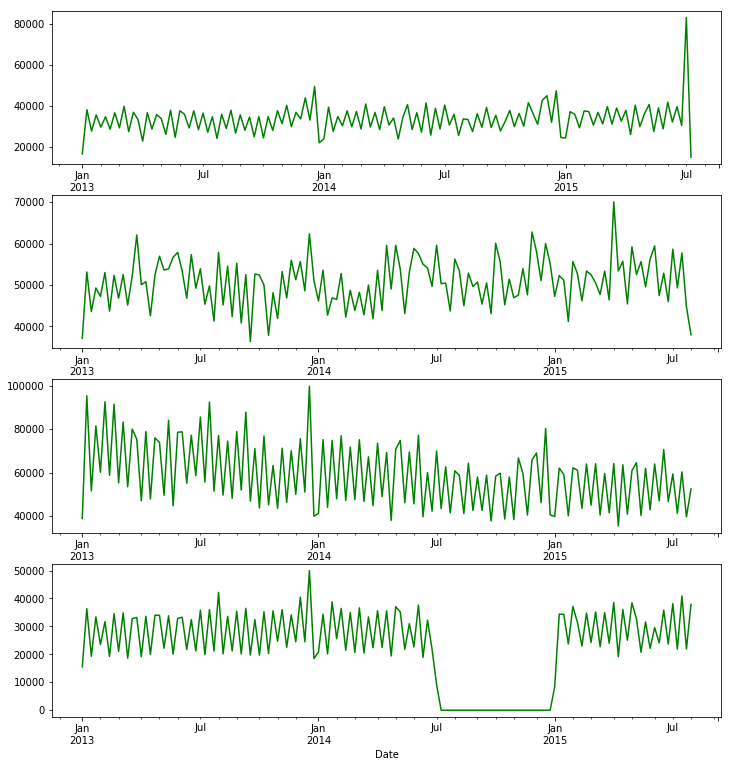

In [87]:

# Picking a store for each type
type_a_sales = df_train[df_train.Store == 292]['Sales']
type_b_sales = df_train[df_train.Store == 85]['Sales']
type_c_sales = df_train[df_train.Store == 1112]['Sales']
type_d_sales = df_train[df_train.Store == 13]['Sales']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# plot line charts to show time series sales trend by store types
type_a_sales.resample('W').sum().plot(color = 'g', ax = ax1)
type_b_sales.resample('W').sum().plot(color = 'g', ax = ax2)
type_c_sales.resample('W').sum().plot(color = 'g', ax = ax3)
type_d_sales.resample('W').sum().plot(color = 'g', ax = ax4)

Type A and C can see an increase in sales at about mid-Dec and a drop in just before Jan. No data for Type D store between Jul 2014 and Jan 2015 which is closed.

In [88]:
df_train_store = df_train_store.sort_index(axis=0, ascending=False)

In [92]:
df_train_store= df_train_store.reset_index(drop=True)


In [93]:
df_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenByMonth,PromoOpenByMonth
0,292,3,5076,672,1,0,0,1,2013,1,2,1,7.553571,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
1,292,4,4580,662,1,0,0,1,2013,1,3,1,6.918429,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
2,292,5,4202,560,1,0,0,1,2013,1,4,1,7.503571,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
3,292,6,2748,340,1,0,0,0,2013,1,5,1,8.082353,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.229885
4,292,1,9291,1002,1,1,0,0,2013,1,7,2,9.272455,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0,24156.459770


In [94]:
df_train_store.to_csv('data/train_store.csv')

In [95]:
df_train_store.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenByMonth,PromoOpenByMonth
844333,1,1,6102,612,1,1,0,1,2015,7,27,31,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.126437
844334,1,2,5011,560,1,1,0,1,2015,7,28,31,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.126437
844335,1,3,4782,523,1,1,0,1,2015,7,29,31,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.126437
844336,1,4,5020,546,1,1,0,1,2015,7,30,31,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.126437
844337,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.126437
